In [2]:
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot  as plt
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import numpy as np
calif = fetch_california_housing()
df = pd.DataFrame(calif.data,columns=calif.feature_names)
df.head(25)
df['target'] = calif.target
df.isnull().sum()
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


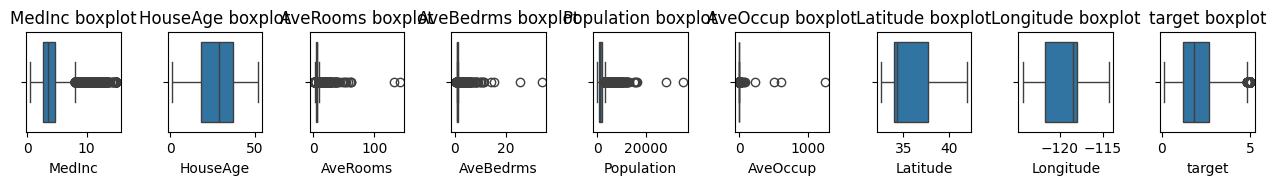

In [3]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(25, 20))
for i, col in enumerate(num_cols):
    plt.subplot(10, 14, i+1)
    sns.boxplot(df[col], orient="h") 
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.show()

In [4]:
for col in num_cols:
    Q1 = df[col].quantile(.25)
    Q3 = df[col].quantile(.75)
    IQR = Q3 - Q1
    Lower_Fence = Q1 - 1.5 * IQR
    Upper_Fence = Q3 + 1.5 * IQR
    Lower_Outliers = df[df[col] < Lower_Fence][col].values
    Upper_Outliers = df[df[col] > Upper_Fence][col].values
    df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
    df[col].replace(Upper_Outliers, Upper_Fence, inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_12808\1797019663.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(Lower_Outliers, Lower_Fence, inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_12808\1797019663.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

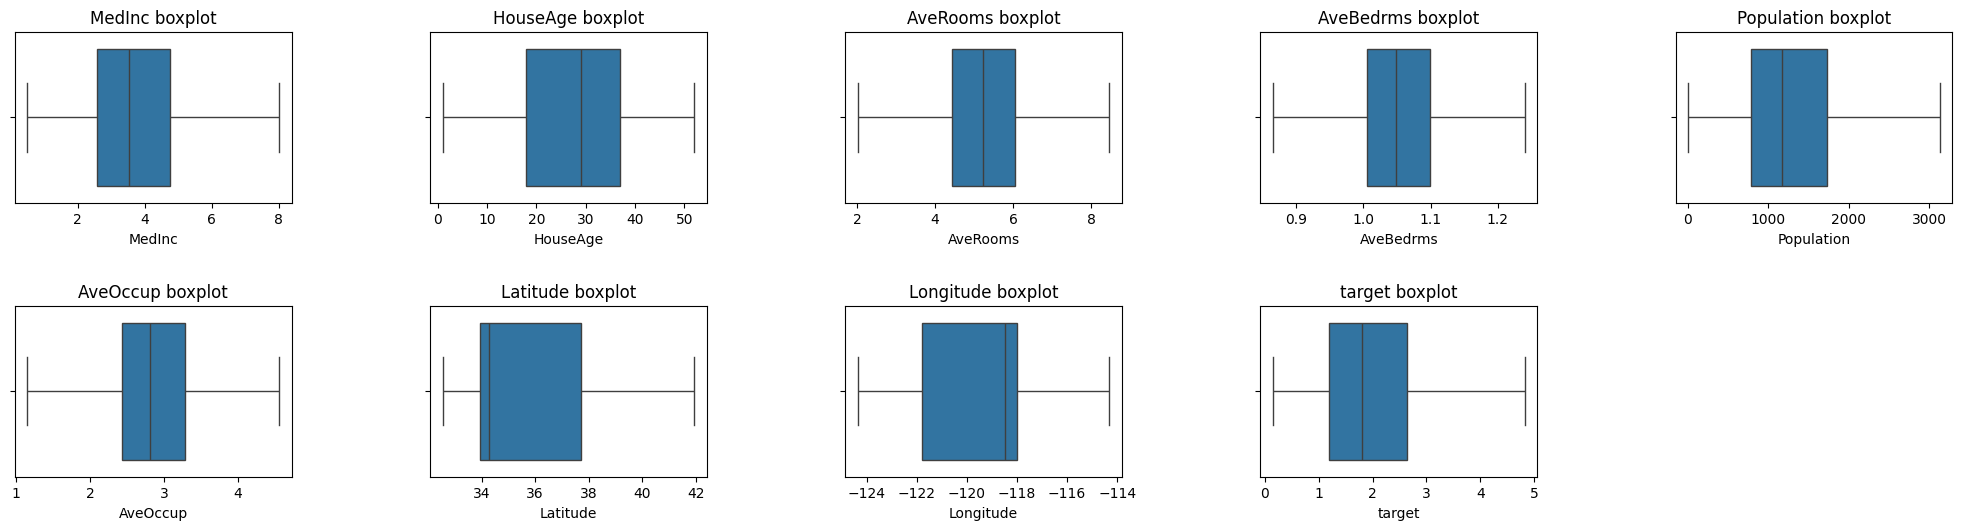

In [8]:
num_cols = df.select_dtypes("number").columns
plt.figure(figsize=(25, 20))
for i, col in enumerate(num_cols):
    plt.subplot(6, 5, i+1)
    sns.boxplot(df[col], orient="h") 
    plt.title(f"{col} boxplot")
plt.subplots_adjust(hspace=.6, wspace=.5)
plt.show()

In [47]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
x=df.drop(['target'],axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
xg_reg = xgb.XGBRegressor(objective ='reg:linear', learning_rate = 0.1,max_depth = 1,
                        n_estimators = 20)
#max_depth->maximum number of leaf nodes allowed in each tree
#n_estimators->represents the number of trees
xg_reg.fit(X_train, y_train)

C:\Users\pc\AppData\Roaming\Python\Python313\site-packages\xgboost\core.py:158: UserWarning: [12:15:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as MSE
y_predict=xg_reg.predict(X_test)
MSE(y_test,y_predict)
r2_score(y_test,y_predict)

0.43121632279963173

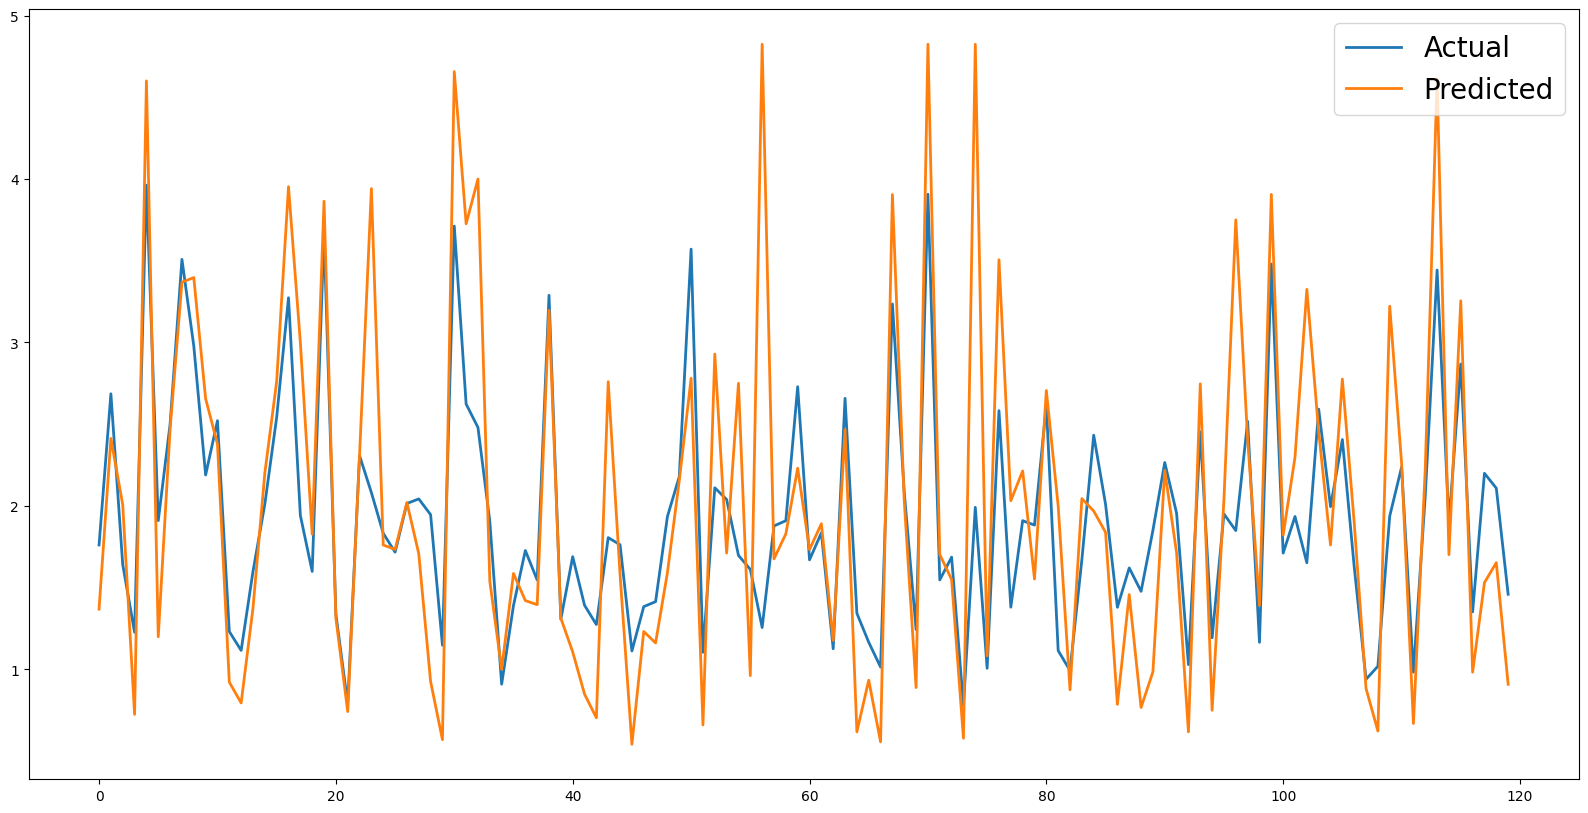

In [29]:
grp = pd.DataFrame({'prediction':y_predict,'Actual':y_test})
grp = grp.reset_index()
grp = grp.drop(['index'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(grp[:120],linewidth=2)
plt.legend(['Actual','Predicted'],prop={'size': 20})